### Time Series Analysis on Beijing PM2.5 Measurement

Business Problem : 14 Days Predictions of the PM2.5 Measurements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

%matplotlib inline
plt.style.use('seaborn-bright')

In [2]:
import matplotlib
import statsmodels
import keras

Using TensorFlow backend.


### Software Version

In [3]:
print ('Author : Lee Jiahe Steven')
print ('Version 1.0')
print ('Software Version......')
print ('')
print ('numpy version is {}'.format(np.__version__))
print ('pandas version is {}'.format(pd.__version__))
print ('matplotlib version is {}'.format(matplotlib.__version__))
print ('seaborn version is {}'.format(sns.__version__))
print ('statsmodels version is {}'.format(statsmodels.__version__))
print ('keras version is {}'.format(keras.__version__))

Author : Lee Jiahe Steven
Version 1.0
Software Version......

numpy version is 1.13.3
pandas version is 0.20.3
matplotlib version is 2.0.2
seaborn version is 0.8.0
statsmodels version is 0.8.0
keras version is 2.0.8


### Loading CSV

Load CSV and set index to datetime

In [4]:
from datetime import datetime

# Only selecting only relevant columns year (1), month (2), day (3), hour (4), pm2.5 (5), dewp (6), temp (7), pres (8), lws (10)
selected_column = ['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']

data = pd.read_csv('Haze.csv', parse_dates = [['year', 'month', 'day', 'hour']],\
                   date_parser = lambda x : datetime.strptime(x, '%Y %m %d %H'),\
                   usecols = selected_column)

# Rename columns
renamed_column = ['time', 'pm2_5', 'dewPoint', 'temp', 'pressure', 'wind_speed']
data.columns = renamed_column

# Set index as time
data.set_index('time', drop = True, inplace = True)

### Drop rows without pm2_5 values since it is the predictor value

It seems like the first day of 2010 has no value, but it is ok to drop it, since there is still many many more data points

In [5]:
data.dropna(axis = 0, inplace = True)

data.describe()

,pm2_5,dewPoint,temp,pressure,wind_speed
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747
std,92.050387,14.433658,12.175215,10.300733,49.617495
min,0.000000,-40.000000,-19.000000,991.000000,0.450000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000
max,994.000000,28.000000,42.000000,1046.000000,565.490000


In [6]:
data['pm2_5'].isnull().sum()

0

### Resampling

There are some days that don't have pm2.5 reading, in such case, we will interpolate these data from the previous reading.

** We are downsampling the data to day resolution **

In [7]:
data = data.resample('D').interpolate('time')

### Visualizing pm2_5 data

#### Line plot of the data points

The red line is the 150 mark, it shows that majority of the time that the PM2.5 measurements are above the healthy range

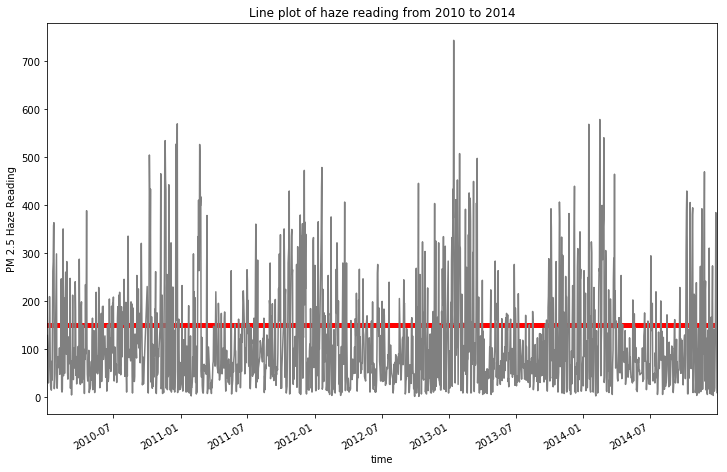

In [8]:
plt.figure(figsize = (12, 8))
plt.title('Line plot of haze reading from 2010 to 2014')
plt.ylabel('PM 2.5 Haze Reading')
plt.xlabel('Hourly measurements')
plt.plot([data.index.min(), data.index.max()], [150, 150], lw = 5, color = 'red')
data['pm2_5'].plot(c = 'grey')
plt.show()

#### Lag plot : Showing relationship between t and t+1 epoch

There is no relationship between the adjacent time epochs

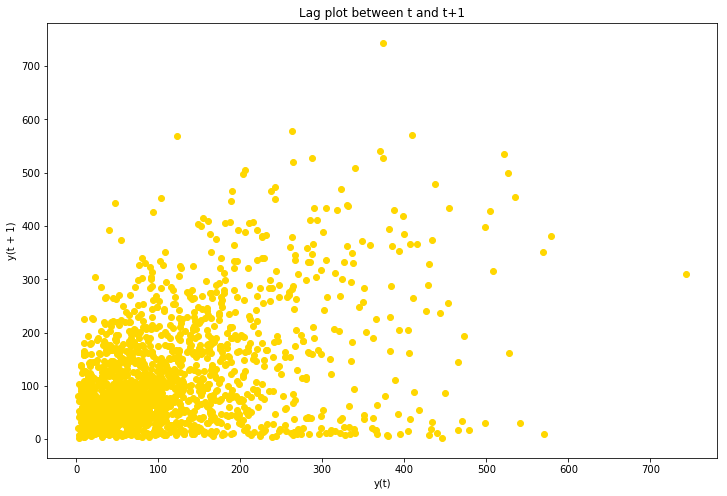

In [9]:
from pandas.plotting import lag_plot

plt.figure(figsize = (12, 8))
plt.title('Lag plot between t and t+1')
lag_plot(data['pm2_5'], c = 'gold')
plt.show()

#### Violin Plot of Quaterly PM2.5 Measurements

This plot wishes to show the quarterly distribution, it seems that in winter and spring the peak pm2.5 measurements are the highest, which can be explained as it is cold in Beijing, so they burn more coal

The summer has lowest distribution

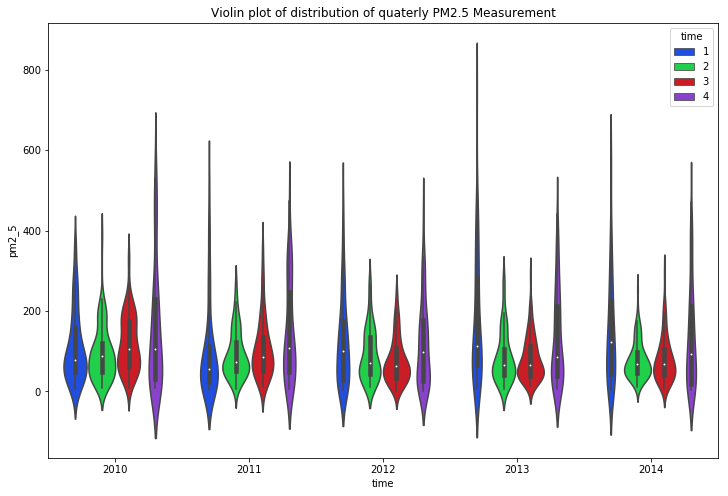

In [10]:
plt.figure(figsize = (12, 8))
plt.title('Violin plot of distribution of quaterly PM2.5 Measurement')
sns.violinplot(x = data.index.year, y = data['pm2_5'], hue = data.index.quarter)

### Point plot of quarterly mean distribution

This shows a year-year comparisons. It seems that the situation is worsening in year 2013 and 2014

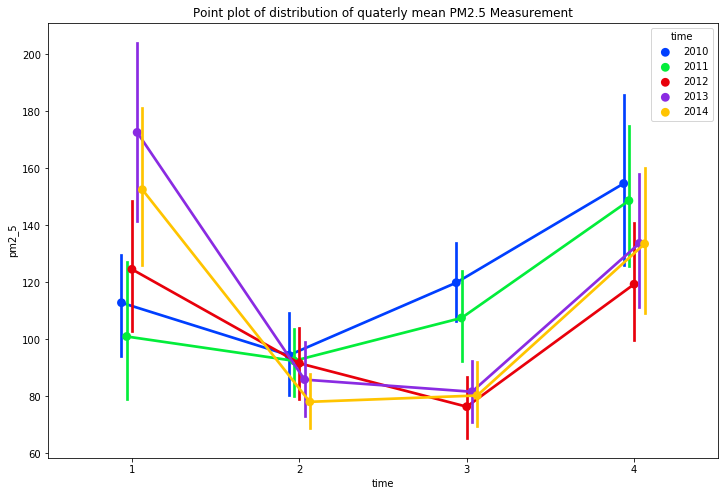

In [11]:
plt.figure(figsize = (12, 8))
plt.title('Point plot of distribution of quaterly mean PM2.5 Measurement')
sns.pointplot(x = data.index.quarter, y = data['pm2_5'], hue = data.index.year, dodge = True)

### Calendar map of maximum PM2.5 measurement

It shows that months from October to March has the highest PM2.5 measurements

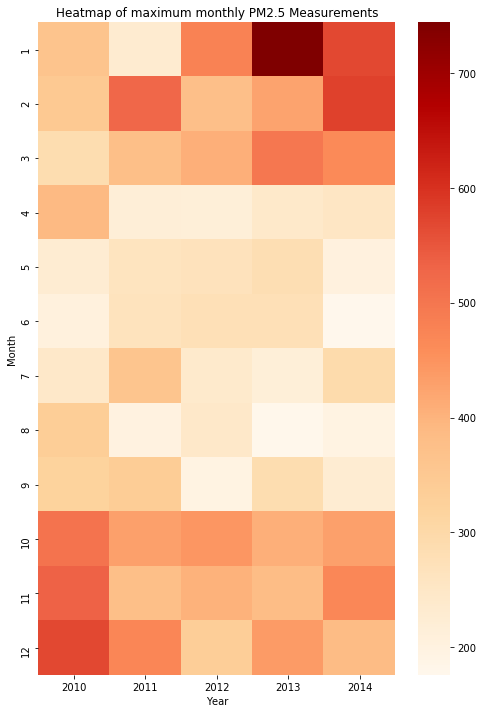

In [12]:
plt.figure(figsize = (8, 12))
plt.title('Heatmap of maximum monthly PM2.5 Measurements')
sns.heatmap(data.groupby([data.index.month, data.index.year])['pm2_5'].max().unstack(), cmap = 'OrRd')
plt.ylabel('Month')
plt.xlabel('Year')

### Bivariate analysis between PM2.5 Measurements and other Variables

There is high concentation at dewpoint between 10 and 20, which can be explained as it occurs at summertime

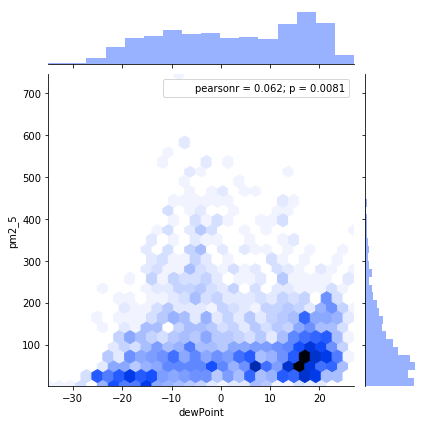

In [13]:
sns.jointplot('dewPoint','pm2_5', data = data, kind = 'hex', )

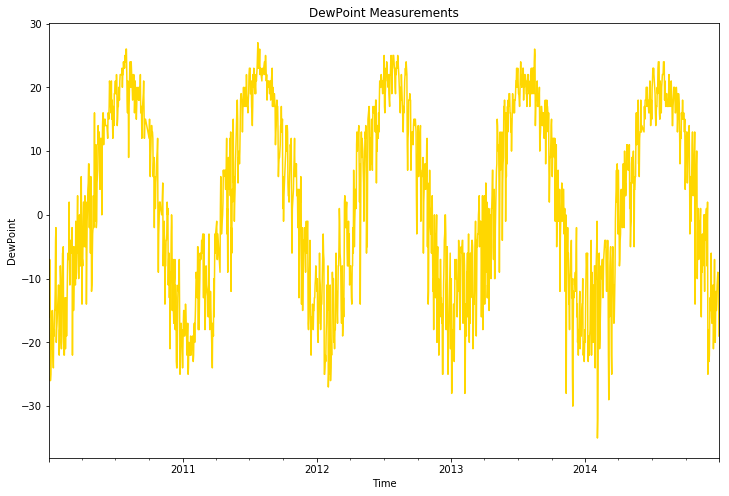

In [19]:
plt.figure(figsize = (12, 8))
plt.title('DewPoint Measurements')
data['dewPoint'].plot(color = 'gold')
plt.ylabel('DewPoint')
plt.xlabel('Time')

The hex plot shows that there is a high concentration at temperature 15 to 25, which concides with Summer time, which can be explained as there is little consumption of coal burning

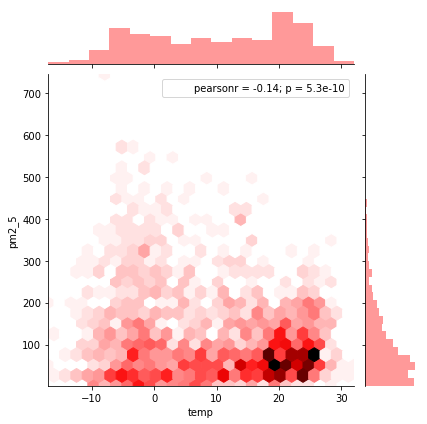

In [14]:
sns.jointplot('temp','pm2_5', data = data, kind = 'hex',color = 'r')

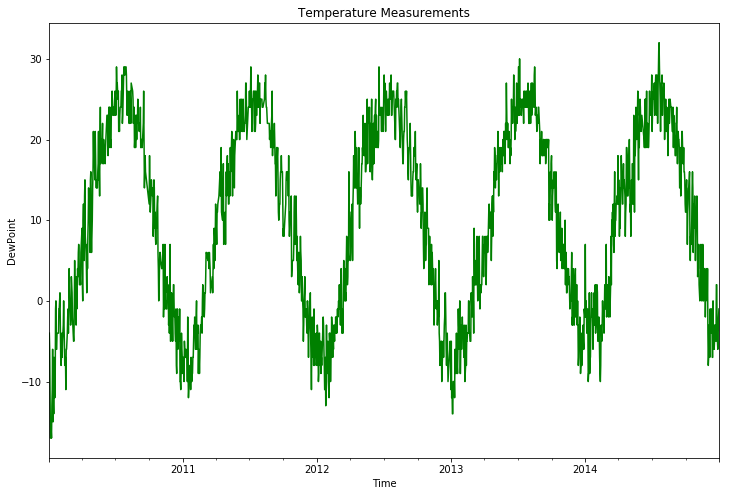

In [20]:
plt.figure(figsize = (12, 8))
plt.title('Temperature Measurements')
data['temp'].plot(color = 'green')
plt.ylabel('DewPoint')
plt.xlabel('Time')

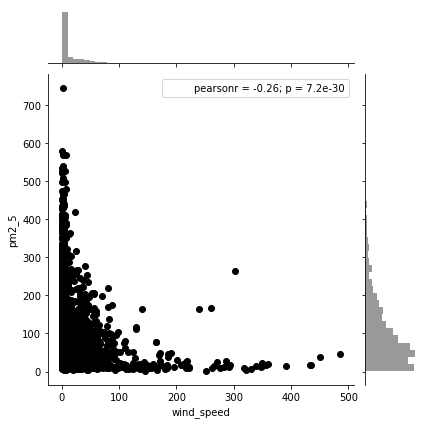

In [21]:
sns.jointplot('wind_speed', 'pm2_5', data = data, color = 'black')

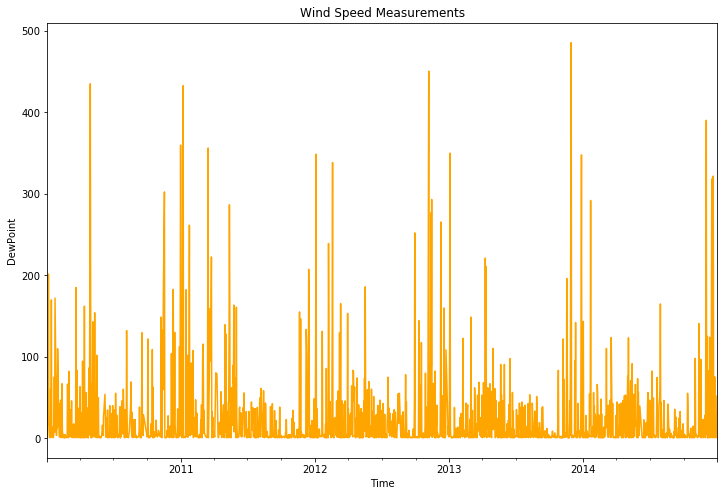

In [23]:
plt.figure(figsize = (12, 8))
plt.title('Wind Speed Measurements')
data['wind_speed'].plot(color = 'orange')
plt.ylabel('DewPoint')
plt.xlabel('Time')

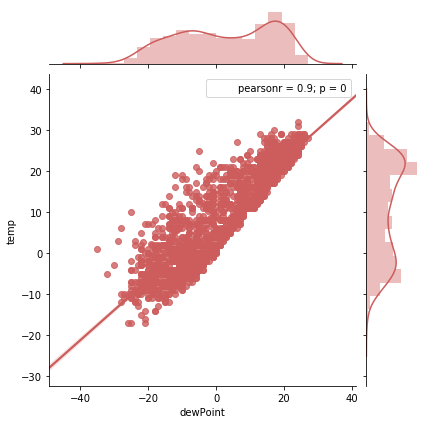

In [22]:
sns.jointplot('dewPoint', 'temp', data = data, kind = 'reg', color = 'indianred')

### Seasonal Decomposition

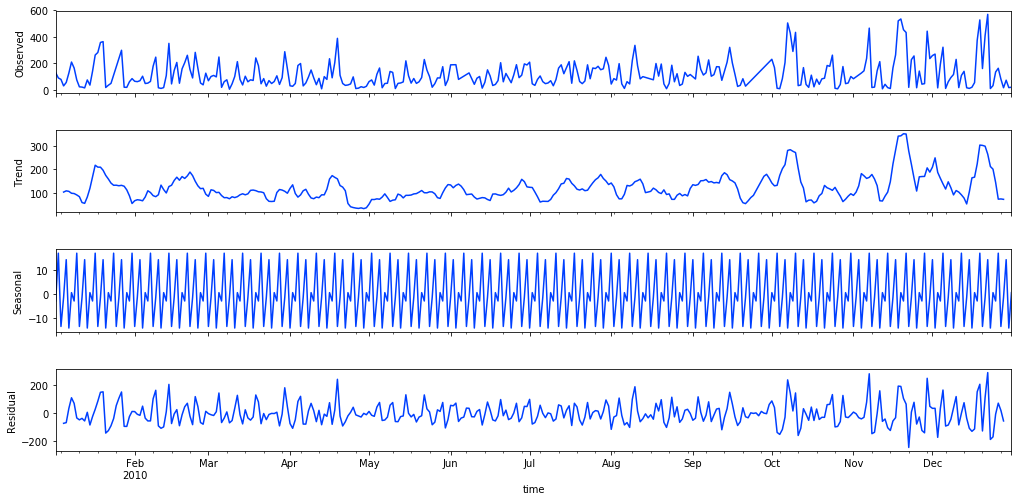

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data.loc['2010', 'pm2_5'])
fig = decompose.plot()
fig.set_size_inches(16, 8)
plt.show()

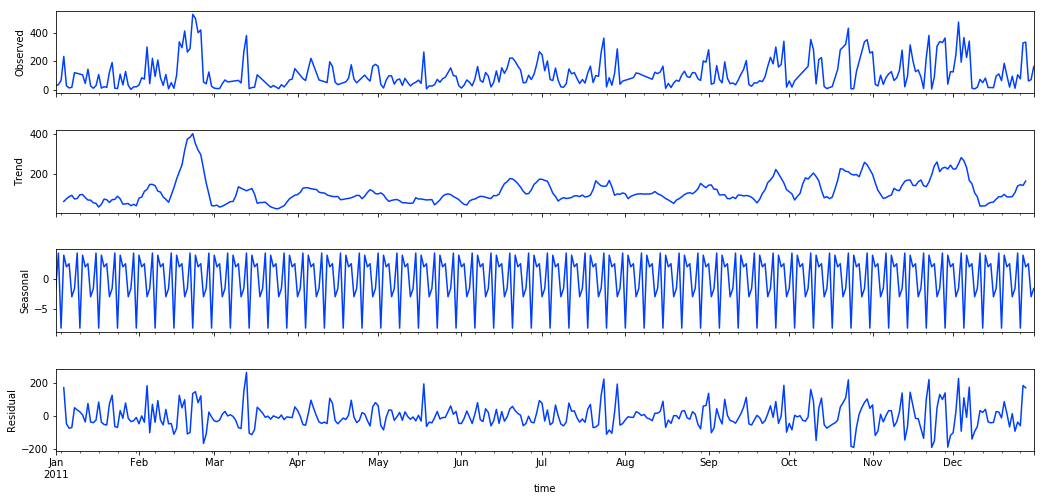

In [26]:
decompose = seasonal_decompose(data.loc['2011', 'pm2_5'])
fig = decompose.plot()
fig.set_size_inches(16, 8)
plt.show()

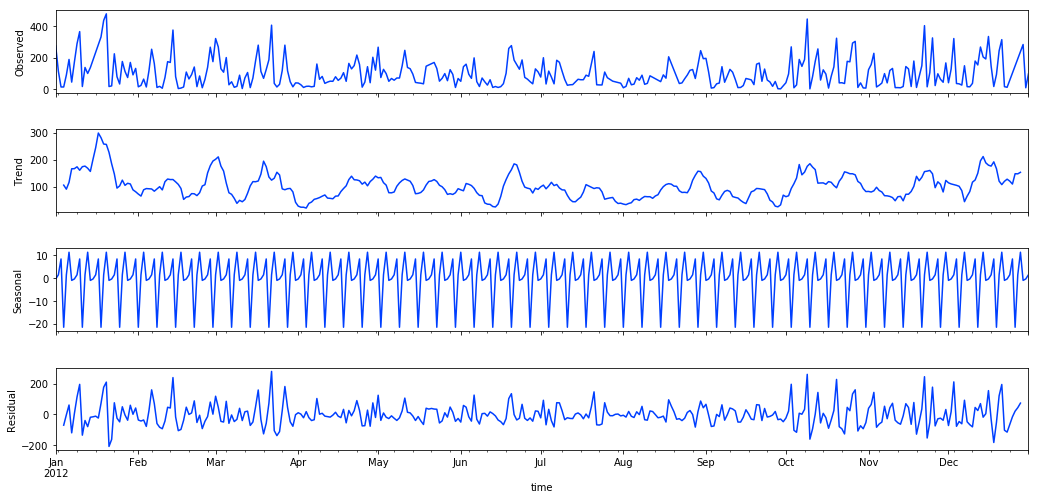

In [27]:
decompose = seasonal_decompose(data.loc['2012', 'pm2_5'])
fig = decompose.plot()
fig.set_size_inches(16, 8)
plt.show()

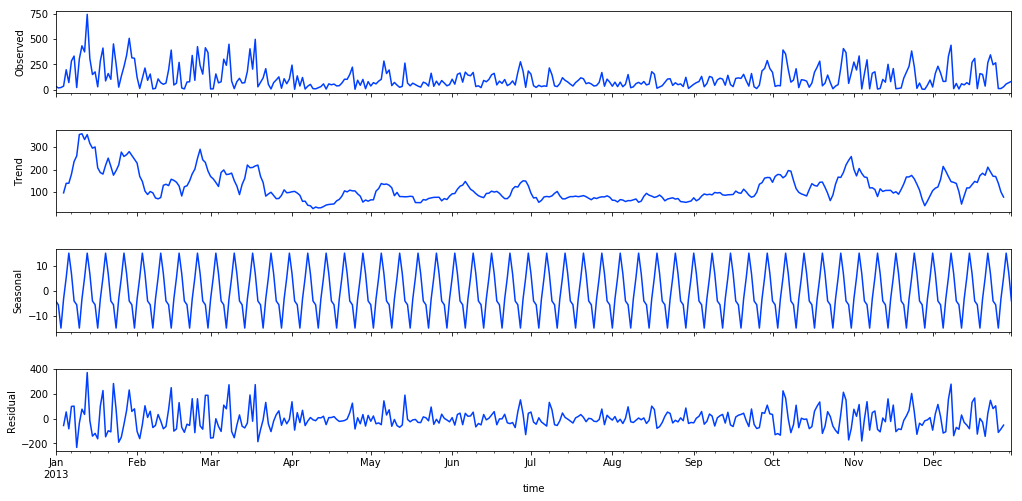

In [28]:
decompose = seasonal_decompose(data.loc['2013', 'pm2_5'])
fig = decompose.plot()
fig.set_size_inches(16, 8)
plt.show()

### Plotting of the autocorrelation plots and partial autocorrelation plots

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

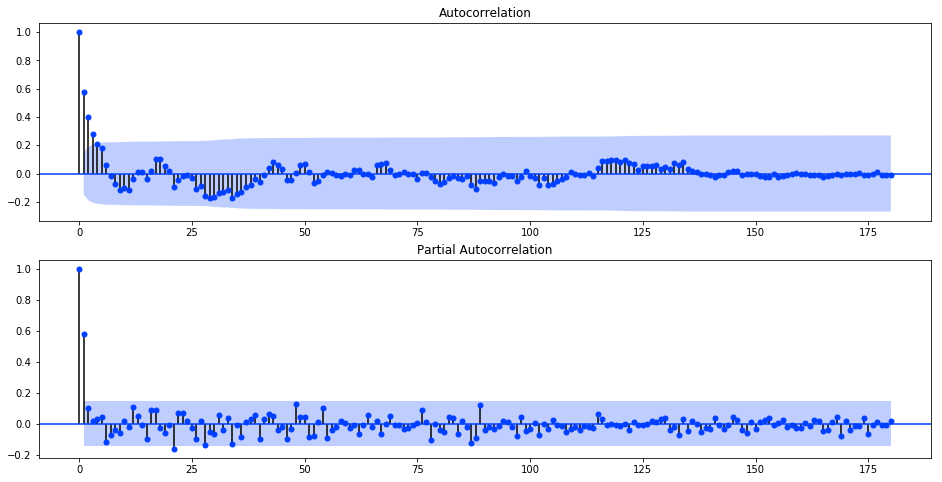

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 8))

plot_acf(data.loc['2011-01' : '2011-06', 'pm2_5'], ax = ax1)
plot_pacf(data.loc['2011-01' : '2011-06', 'pm2_5'], ax = ax2)
plt.show()

### Testing for stationarity

Using n-order difference, log, log difference and seasonal difference (shift by 12)

In [31]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(ts, title):
    rolling_mean = ts.rolling(window = 12).mean()
    rolling_std = ts.rolling(window = 12).std()
    
    plt.figure(figsize = (12, 8))
    plt.plot(ts, label = 'Original')
    plt.plot(rolling_mean, label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Std of ' + title)
    plt.show()
    
    result = adfuller(ts.values.squeeze(), autolag = 'AIC')
    df = pd.DataFrame(list(result[:4]), index = ['Test Statistics', 'p-val', '# of Lags', '# of Observations'])
    
    for k, v in result[4].items():
        df.loc['Critical Value %s'%k, 0] = v
    
    print (df)
    return df.loc['Critical Value 5%', 0]

### Dickey-Fuller Test for untransformed time series, to be set as baseline model

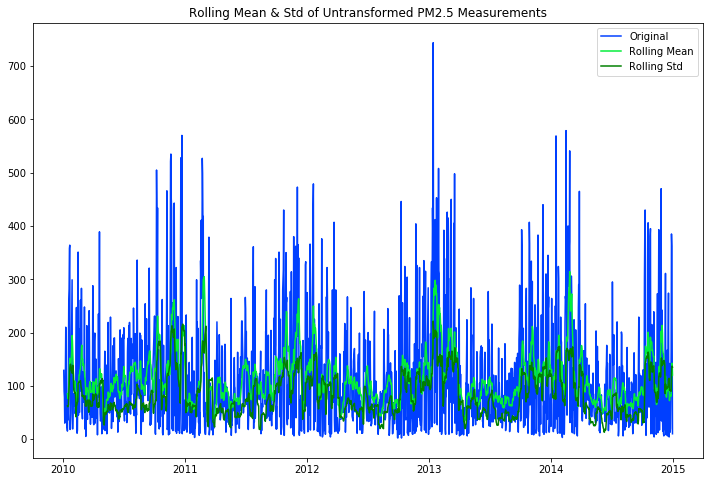

                               0
Test Statistics    -6.954760e+00
p-val               9.491461e-10
# of Lags           2.100000e+01
# of Observations   1.803000e+03
Critical Value 1%  -3.433982e+00
Critical Value 5%  -2.863144e+00
Critical Value 10% -2.567624e+00


In [32]:
untrans_cv5 = test_stationary(data['pm2_5'], 'Untransformed PM2.5 Measurements')

### Dickey-Fuller test for differenced by 1 lag data

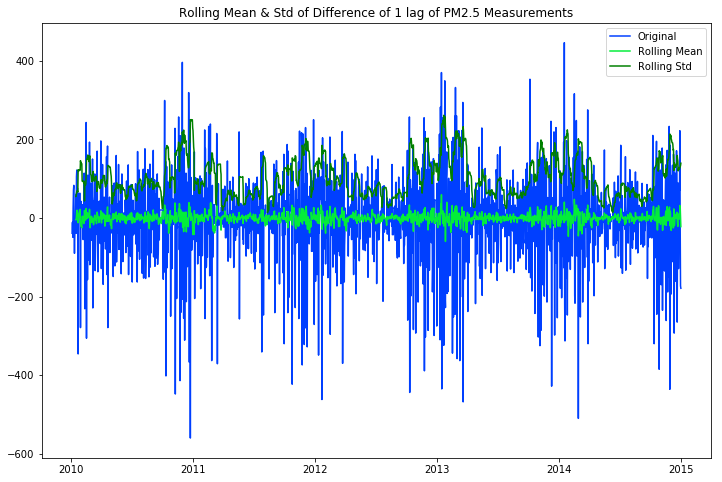

                               0
Test Statistics    -1.579150e+01
p-val               1.100814e-28
# of Lags           2.000000e+01
# of Observations   1.803000e+03
Critical Value 1%  -3.433982e+00
Critical Value 5%  -2.863144e+00
Critical Value 10% -2.567624e+00


In [33]:
diff_cv5 = test_stationary(data['pm2_5'].diff().dropna(), 'Difference of 1 lag of PM2.5 Measurements')

### Dickey-Fuller test for log of data

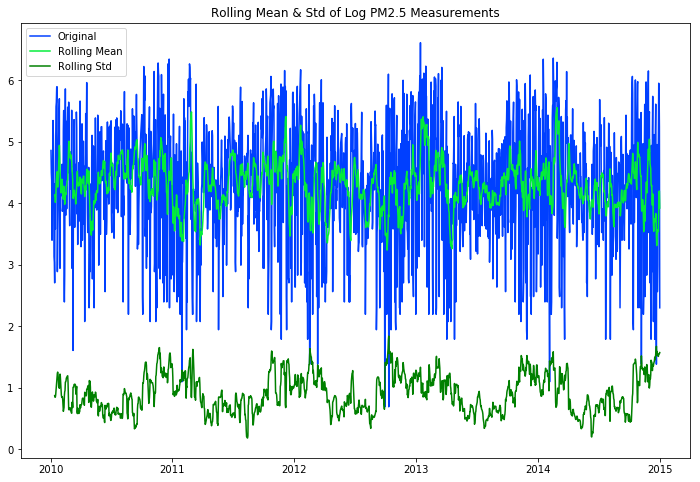

                              0
Test Statistics      -20.690511
p-val                  0.000000
# of Lags              3.000000
# of Observations   1821.000000
Critical Value 1%     -3.433946
Critical Value 5%     -2.863128
Critical Value 10%    -2.567616


In [34]:
log_cv5 = test_stationary(np.log(data['pm2_5']), 'Log PM2.5 Measurements')

### Dickey-Fuller test of log and differencing of 1 lag

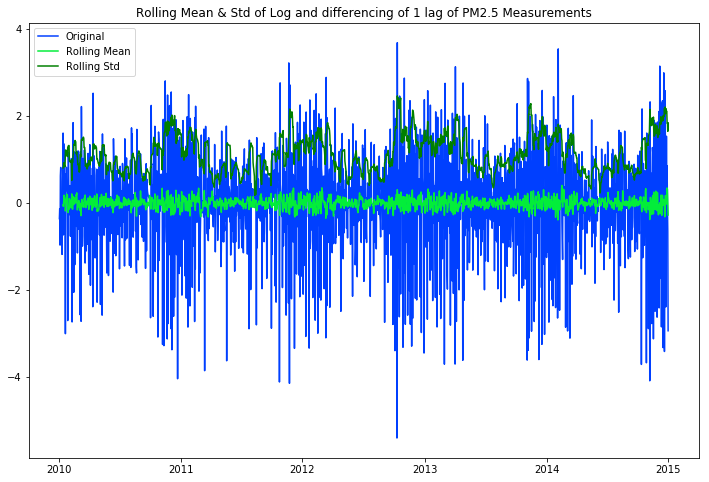

                               0
Test Statistics    -1.420103e+01
p-val               1.787704e-26
# of Lags           2.400000e+01
# of Observations   1.799000e+03
Critical Value 1%  -3.433990e+00
Critical Value 5%  -2.863148e+00
Critical Value 10% -2.567626e+00


In [35]:
log_diff_cv5 = test_stationary(np.log(data['pm2_5']).diff().dropna(), 'Log and differencing of 1 lag of PM2.5 Measurements')

### Dickey-Fuller test of differencing of 12 months (365 lags since it is daily measurements) lag to remove seasonality

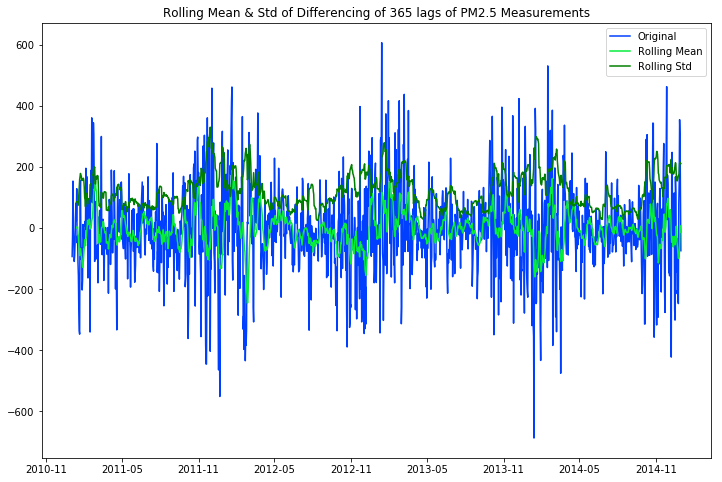

                               0
Test Statistics    -9.075158e+00
p-val               4.198507e-15
# of Lags           1.800000e+01
# of Observations   1.441000e+03
Critical Value 1%  -3.434896e+00
Critical Value 5%  -2.863548e+00
Critical Value 10% -2.567839e+00


In [36]:
diff_365_cv5 = test_stationary(data['pm2_5'].diff(365).dropna(), 'Differencing of 365 lags of PM2.5 Measurements')

In [38]:
critical_values = pd.Series({'Original': untrans_cv5, '1 lag': diff_cv5, 'Log' : log_cv5, \
                             'Log with 1 lag': log_diff_cv5, 'Season differencing': diff_365_cv5})

critical_values

1 lag                 -2.863144
Log                   -2.863128
Log with 1 lag        -2.863148
Original              -2.863144
Season differencing   -2.863548
dtype: float64

In [39]:
print ('The transformation that has the lowest 5% critical values is ', critical_values.argmin())

The transformation that has the lowest 5% critical values is  Season differencing
